In [2]:
import cv2
import numpy as np
import time

# Создаём карту
карта = np.zeros((500, 500, 3), dtype=np.uint8)
cv2.rectangle(карта, (150, 150), (350, 350), (255, 255, 255), 2)

# Маршрут — обход квадрата
путь = [
    (150, 150), (350, 150),
    (350, 350), (150, 350),
    (150, 150)
]

# Анимация
for i in range(len(путь) - 1):
    start = путь[i]
    end = путь[i+1]
    
    # Делим отрезок на шаги
    steps = 50
    for t in range(steps + 1):
        x = int(start[0] + (end[0] - start[0]) * t / steps)
        y = int(start[1] + (end[1] - start[1]) * t / steps)
        
        копия = карта.copy()
        cv2.circle(копия, (x, y), 8, (0, 0, 255), -1)  # робот — красная точка
        cv2.imshow("Робот едет", копия)
        
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
    time.sleep(0.2)

cv2.destroyAllWindows()

In [6]:
from PIL import Image
import numpy as np

def photo_to_pixel_art(input_path, output_path, pixel_size=10, bw=True):
    """
    Преобразует фото в ч/б пиксель-арт
    
    Args:
        input_path: путь к исходному фото
        output_path: куда сохранить результат
        pixel_size: размер пикселя (чем больше - блочнее)
        bw: черно-белый режим
    """
    # Открываем изображение
    img = Image.open(input_path)
    
    # Уменьшаем размер для пикселизации
    width, height = img.size
    small_size = (width // pixel_size, height // pixel_size)
    
    # Уменьшаем изображение
    small_img = img.resize(small_size, Image.NEAREST)
    
    if bw:
        # Конвертируем в ч/б
        small_img = small_img.convert('L')  # 'L' - черно-белый режим
    
    # Увеличиваем обратно до исходного размера
    result = small_img.resize((width, height), Image.NEAREST)
    
    # Сохраняем результат
    result.save(output_path)
    print(f"Пиксель-арт сохранен в: {output_path}")
    return result

# Использование
if __name__ == "__main__":
    photo_to_pixel_art("img-53415-14964303316571.jpg", "pixel_art_output.png", pixel_size=30, bw=True)

Пиксель-арт сохранен в: pixel_art_output.png


In [9]:
from PIL import Image
import numpy as np

def image_to_robot_grid(input_path, output_size=(20, 20), threshold=128):
    """
    Преобразует фото в сетку для робота (0-пусто, 1-рисовать)
    """
    # Открываем и преобразуем в ч/б
    img = Image.open(input_path).convert('L')
    img = img.resize(output_size)
    
    # Преобразуем в numpy array и применяем порог
    img_array = np.array(img)
    binary_array = (img_array > threshold).astype(int)
    
    return binary_array

def save_robot_instructions(grid, output_file="robot_instructions.txt"):
    """
    Сохраняет инструкции для робота в текстовый файл
    """
    height, width = grid.shape
    
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(f"РАЗМЕР СЕТКИ: {width}x{height}\n")
        f.write("0 - не рисовать, 1 - ставить точку\n\n")
        
        # Сетка для робота
        f.write("СЕТКА:\n")
        for y in range(height):
            for x in range(width):
                f.write("█" if grid[y, x] else " ")
            f.write("\n")
        
        f.write("\nКООРДИНАТЫ ДЛЯ РИСОВАНИЯ:\n")
        points = []
        for y in range(height):
            for x in range(width):
                if grid[y, x] == 1:
                    points.append((x, y))
                    f.write(f"({x}, {y})\n")
    
    print(f"Инструкции сохранены в: {output_file}")
    return points

# Использование
grid = image_to_robot_grid("img-53415-14964303316571.jpg", output_size=(15, 15))
points = save_robot_instructions(grid)

Инструкции сохранены в: robot_instructions.txt


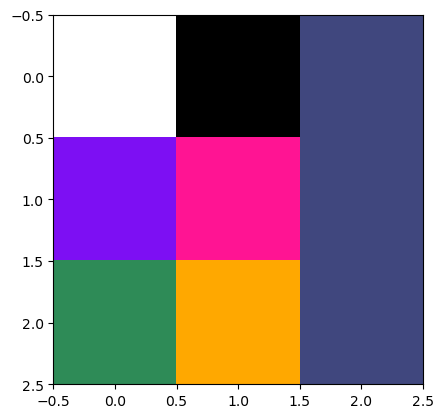

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Создаем простую матрицу (3x3)
matrix = np.array([
    [[255, 255, 255], [0, 0, 0], [64, 71, 126]],
    [[125, 15, 243], [255, 20, 147], [64, 71, 126]], 
    [[46, 139, 87], [255, 168, 0], [64, 71, 126]],
])

plt.imshow(matrix)  # Покажи матрицу как картинку
plt.show()  # Покажи на экране

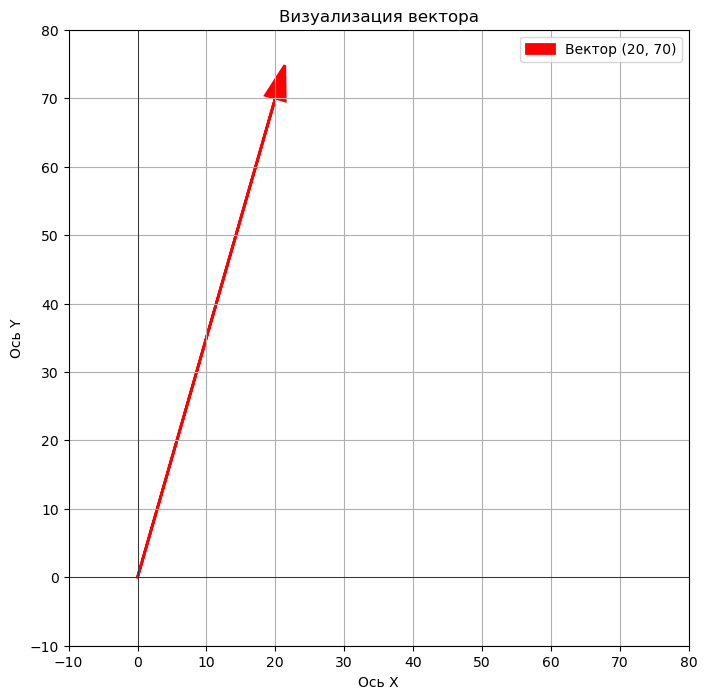

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Твой вектор
x = 20
y = 70

# Создаем график
plt.figure(figsize=(8, 8))
plt.grid(True)

# Рисуем вектор как стрелку от начала координат (0,0) до (20,70)
plt.arrow(0, 0, x, y, 
          head_width=3, head_length=5, 
          fc='red', ec='red', linewidth=2,
          label=f'Вектор ({x}, {y})')

# Настройки графика
plt.xlim(-10, 80)
plt.ylim(-10, 80)
plt.axhline(y=0, color='k', linewidth=0.5)  # Ось X
plt.axvline(x=0, color='k', linewidth=0.5)  # Ось Y
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.title('Визуализация вектора')
plt.legend()
plt.show()

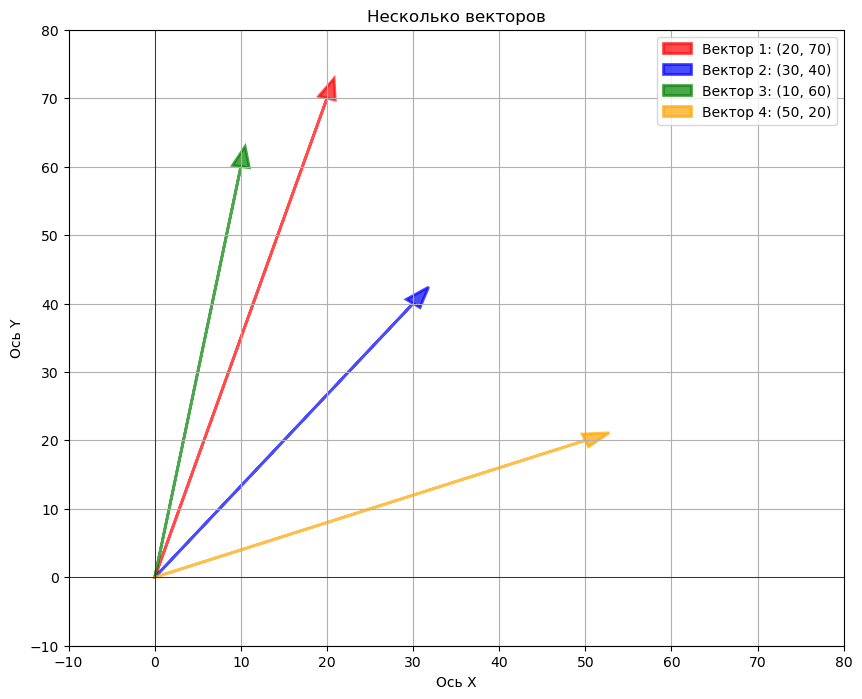

In [15]:
import matplotlib.pyplot as plt

# Несколько векторов для сравнения
векторы = [
    (20, 70),   # Твой вектор
    (30, 40),   # Еще один
    (10, 60),   # И еще
    (50, 20)    # И еще
]

цвета = ['red', 'blue', 'green', 'orange']

plt.figure(figsize=(10, 8))
plt.grid(True)

for i, (x, y) in enumerate(векторы):
    plt.arrow(0, 0, x, y, 
              head_width=2, head_length=3,
              fc=цвета[i], ec=цвета[i], 
              linewidth=2, alpha=0.7,
              label=f'Вектор {i+1}: ({x}, {y})')

plt.xlim(-10, 80)
plt.ylim(-10, 80)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.title('Несколько векторов')
plt.legend()
plt.show()

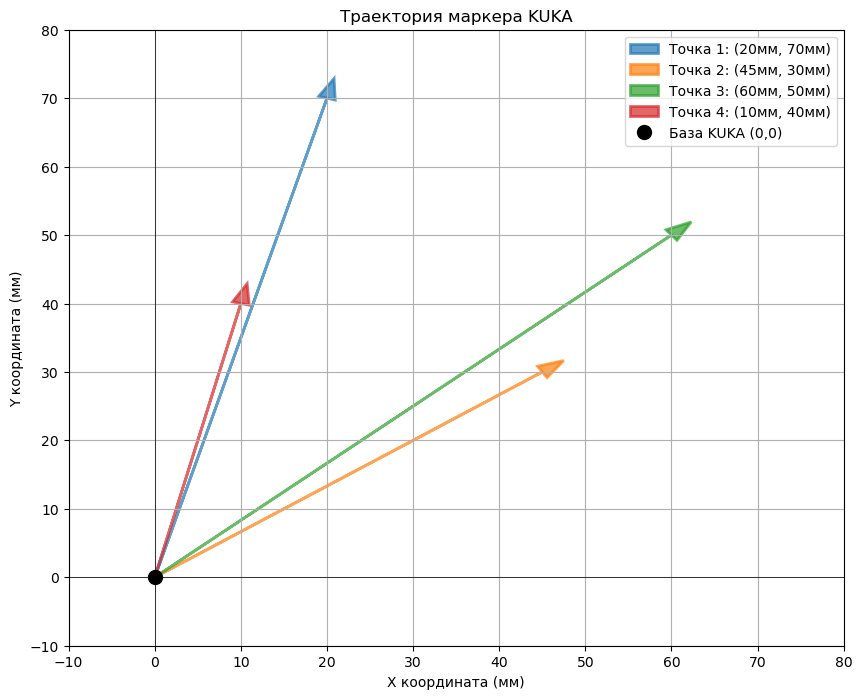

In [16]:
import matplotlib.pyplot as plt

# Координаты которые будет использовать KUKA
координаты_робота = [
    (20, 70),   # Точка 1
    (45, 30),   # Точка 2  
    (60, 50),   # Точка 3
    (10, 40)    # Точка 4
]

plt.figure(figsize=(10, 8))
plt.grid(True)

# Рисуем все векторы (радиус-векторы от базы робота)
for i, (x, y) in enumerate(координаты_робота):
    plt.arrow(0, 0, x, y, 
              head_width=2, head_length=3,
              fc=f'C{i}', ec=f'C{i}', 
              linewidth=2, alpha=0.7,
              label=f'Точка {i+1}: ({x}мм, {y}мм)')

# Показываем где будет база робота
plt.plot(0, 0, 'ko', markersize=10, label='База KUKA (0,0)')

plt.xlim(-10, 80)
plt.ylim(-10, 80)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.xlabel('X координата (мм)')
plt.ylabel('Y координата (мм)') 
plt.title('Траектория маркера KUKA')
plt.legend()
plt.show()

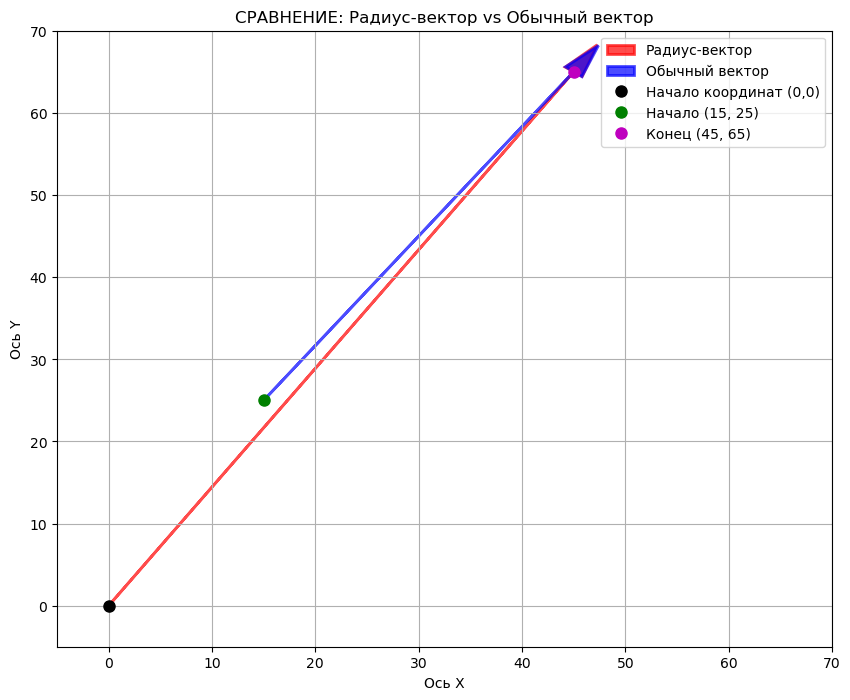

In [1]:
import matplotlib.pyplot as plt

# Данные
начало = (15, 25)
конец = (45, 65)

# Векторы
радиус_вектор = (45, 65)           # От (0,0) до конца
обычный_вектор = (30, 40)          # От начала до конца (45-15, 65-25)

plt.figure(figsize=(10, 8))
plt.grid(True)

# 1. РАДИУС-вектор (от начала координат)
plt.arrow(0, 0, радиус_вектор[0], радиус_вектор[1],
          head_width=2, head_length=4, fc='red', ec='red', 
          linewidth=2, alpha=0.7, label='Радиус-вектор')

# 2. ОБЫЧНЫЙ вектор (между точками)
plt.arrow(начало[0], начало[1], обычный_вектор[0], обычный_вектор[1],
          head_width=2, head_length=4, fc='blue', ec='blue',
          linewidth=2, alpha=0.7, label='Обычный вектор')

# Точки
plt.plot(0, 0, 'ko', markersize=8, label='Начало координат (0,0)')
plt.plot(начало[0], начало[1], 'go', markersize=8, label=f'Начало {начало}')
plt.plot(конец[0], конец[1], 'mo', markersize=8, label=f'Конец {конец}')

plt.xlim(-5, 70)
plt.ylim(-5, 70)
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.title('СРАВНЕНИЕ: Радиус-вектор vs Обычный вектор')
plt.legend()
plt.show()

In [ ]:
import numpy as np

v1 = input().split(" ")
v2 = input().split(" ")
l2 = np.linalg.norm(np.array(v1+v2, dtype=float))
print(l2)

10.198039027185569
